# Note : I have run all the code at the number of epochs which are shown in reference textbook. So please excuse me for the long epochs and thank you for the patience to go through my long notebooks as I wanted to learn it effectively.

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.1.3'

In [2]:
%matplotlib inline

In [3]:
import os, shutil

In [4]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/home/ec2-user/data/train'

# The directory where we will
# store our smaller dataset
base_dir = '/home/ec2-user/data/cats_and_dogs_small'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [5]:

print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [6]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [7]:

print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [8]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [9]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [10]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


# Problem 1

## Part 1

### The first part of the problem states to verify the code and working for basic binary classification which is given below

In [12]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

# Since we are attacking a binary classification problem, we are ending the network with a single unit 
# (a Dense layer of size 1) and a sigmoid activation. This unit will encode the probability that the network is 
# looking at one class or the other.
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [14]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [15]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
    
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
    
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [17]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100, #100
      epochs=30,#30
      validation_data=validation_generator,
      validation_steps=50) #50

Epoch 1/30
100/100 [==============================] - 16s 157ms/step - loss: 0.6904 - acc: 0.5335 - val_loss: 0.6710 - val_acc: 0.6160
Epoch 2/30
100/100 [==============================] - 8s 75ms/step - loss: 0.6554 - acc: 0.6090 - val_loss: 0.6311 - val_acc: 0.6490
Epoch 3/30
100/100 [==============================] - 8s 76ms/step - loss: 0.6048 - acc: 0.6640 - val_loss: 0.6045 - val_acc: 0.6650
Epoch 4/30
100/100 [==============================] - 8s 76ms/step - loss: 0.5600 - acc: 0.7135 - val_loss: 0.6022 - val_acc: 0.6680
Epoch 5/30
100/100 [==============================] - 8s 75ms/step - loss: 0.5357 - acc: 0.7300 - val_loss: 0.5804 - val_acc: 0.6890
Epoch 6/30
100/100 [==============================] - 8s 77ms/step - loss: 0.5147 - acc: 0.7445 - val_loss: 0.5842 - val_acc: 0.6880
Epoch 7/30
100/100 [==============================] - 8s 75ms/step - loss: 0.4852 - acc: 0.7700 - val_loss: 0.5784 - val_acc: 0.6980
Epoch 8/30
100/100 [==============================] - 7s 75ms/step 

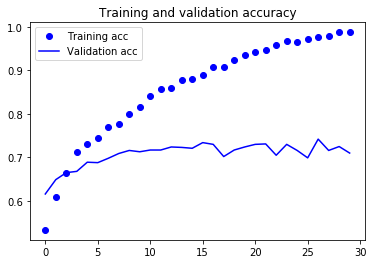

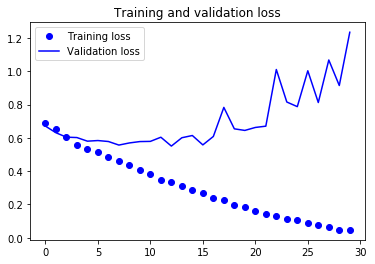

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Result without L2 regularization

* As can be seen from the above two plots, without L2 regularization, overfitting is happening.


# Part 2

## Now, we move to the second part of the problem 

* Here we are asked to modify the model by adding L2 regularization, which we do so by adding the value of regularizer lambda (0.0001) at one step before the last Dense layer 

* This step is shown below and then we again run the model and calculate the validation accuracy and loss.

* Finally we will compare these with the book's validation accuracy and loss which we just calculated above

In [11]:
from keras import layers
from keras import models
from keras import regularizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, kernel_regularizer = regularizers.l2(0.0001),activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [13]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [14]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
    
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
    
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [16]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100, #100
      epochs= 30,#30
      validation_data=validation_generator,
      validation_steps=50) #50

Epoch 1/30
100/100 [==============================] - 16s 164ms/step - loss: 0.7650 - acc: 0.5315 - val_loss: 0.7351 - val_acc: 0.5660
Epoch 2/30
100/100 [==============================] - 8s 75ms/step - loss: 0.7138 - acc: 0.6060 - val_loss: 0.7247 - val_acc: 0.5390
Epoch 3/30
100/100 [==============================] - 8s 76ms/step - loss: 0.6609 - acc: 0.6710 - val_loss: 0.6625 - val_acc: 0.6610
Epoch 4/30
100/100 [==============================] - 7s 74ms/step - loss: 0.6099 - acc: 0.7060 - val_loss: 0.6345 - val_acc: 0.6780
Epoch 5/30
100/100 [==============================] - 7s 74ms/step - loss: 0.5818 - acc: 0.7340 - val_loss: 0.6217 - val_acc: 0.6970
Epoch 6/30
100/100 [==============================] - 8s 76ms/step - loss: 0.5472 - acc: 0.7500 - val_loss: 0.6062 - val_acc: 0.7020
Epoch 7/30
100/100 [==============================] - 7s 74ms/step - loss: 0.5296 - acc: 0.7655 - val_loss: 0.6657 - val_acc: 0.6640
Epoch 8/30
100/100 [==============================] - 8s 76ms/step 

### Let's plot the loss and accuracy of the model over the training and validation data during training:

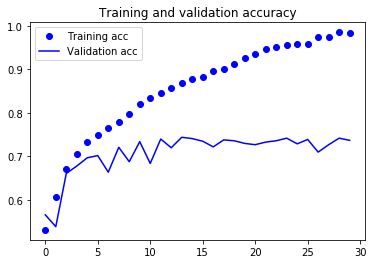

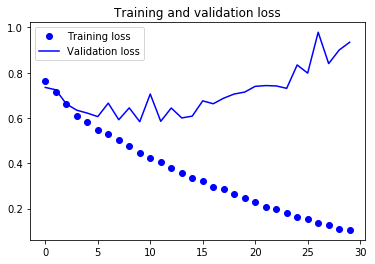

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Conclusion

* These plots indicate a small but good amount of improvement in terms of overfitting as compared to the model without regularization. 

* Our training accuracy increases linearly over time, until it reaches nearly 100%, while our validation accuracy is at 70-75% which is a slight improvement from the model without L2 regularization.

* Our validation loss reaches its minimum after 13 epochs and without regularization, the validation loss had reached the minimum after five epochs, while the training loss keeps decreasing linearly until it reaches nearly 0.

# Problem 2 

* Setting up a data augmentation configuration via ImageDataGenerator
* Just for experimentation purposes, out of curiosity, I have tried all image augmentation options as shown below. 

In [22]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

### Displaying some randomly augmented training images

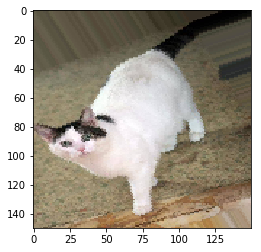

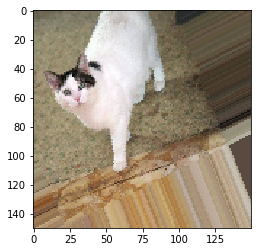

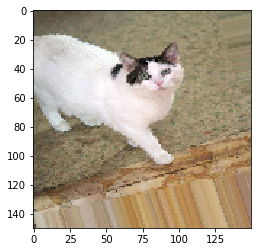

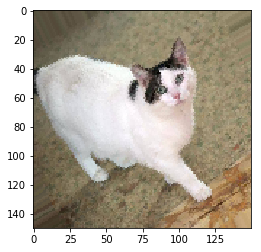

In [24]:
from keras.preprocessing import image                           
fnames = [os.path.join(train_cats_dir, fname) for
     fname in os.listdir(train_cats_dir)]

img_path = fnames[3]                                            

img = image.load_img(img_path, target_size=(150, 150))          

x = image.img_to_array(img)                                     
x = x.reshape((1,) + x.shape)                                   

i = 0                                                           
for batch in datagen.flow(x, batch_size=1):                     
    plt.figure(i)                                               
    imgplot = plt.imshow(image.array_to_img(batch[0]))          
    i += 1                                                      
    if i % 4 == 0:                                              
        break                                                   

plt.show()

## Training a new network using this data-augmentation configuration will never see the same input twice but the inputs the network will see will still be heavily intercorrelated as they will come from a small number of original images.

## Hence to further fight and reduce overfitting, we will have to add a Dropout layer to the model before the densely connected classifier. 

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Training the convnet using data-augmentation generators for epochs = 100

In [26]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)               

train_generator = train_datagen.flow_from_directory(
        train_dir,                                              
        target_size=(150, 150),                                 
        batch_size=32,
        class_mode='binary')                                    

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 24s 243ms/step - loss: 0.6897 - acc: 0.5331 - val_loss: 0.6782 - val_acc: 0.5190
Epoch 2/100
100/100 [==============================] - 22s 217ms/step - loss: 0.6736 - acc: 0.5694 - val_loss: 0.6621 - val_acc: 0.6095
Epoch 3/100
100/100 [==============================] - 22s 219ms/step - loss: 0.6640 - acc: 0.5919 - val_loss: 0.6419 - val_acc: 0.6028
Epoch 4/100
100/100 [==============================] - 22s 223ms/step - loss: 0.6473 - acc: 0.6128 - val_loss: 0.6054 - val_acc: 0.6811
Epoch 5/100
100/100 [==============================] - 22s 218ms/step - loss: 0.6290 - acc: 0.6409 - val_loss: 0.6485 - val_acc: 0.6085
Epoch 6/100
100/100 [==============================] - 24s 236ms/step - loss: 0.6180 - acc: 0.6522 - val_loss: 0.6180 - val_acc: 0.6334
Epoch 7/100
100/100 [==============================] - 22s 215ms/step - loss: 0.5969 - acc: 0.6763 -

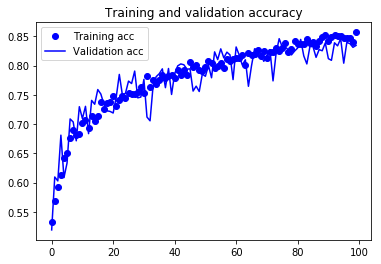

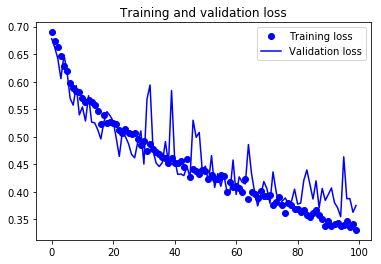

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Conclusion

* The validation accuracy sharply follows the training accuracy.

* Doing data augmentation and dropout, we are no longer overfitting: the training curves are rather closely tracking the validation curves. We are now able to reach an accuracy of 86%


